In [291]:
import numpy as np
from matplotlib import pyplot as plt
import math
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import glob
from PIL import Image
from PIL import Image, ImageDraw

In [292]:

def make_gif(frame_folder,size = 40):
    frames = []
    for number in range(size):
        frames.append(Image.open(frame_folder+str(number)+".png"))
       
    frame_one = frames[0]
    print(len(frames))
    frame_one.save("animation.gif", format="GIF", append_images=frames,
                   save_all=True, duration=100, loop=0)

In [811]:
def generator_function(x):
    return 1*np.sin(3*x) + 2*np.cos(5*x)

def noisfy(x):
    return np.random.random(x.shape)-0.5 +x
def generate_random_data(dim =2,size =20,spread=10):
    return np.ndarray.flatten(np.random.random((size,dim)))*2;

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

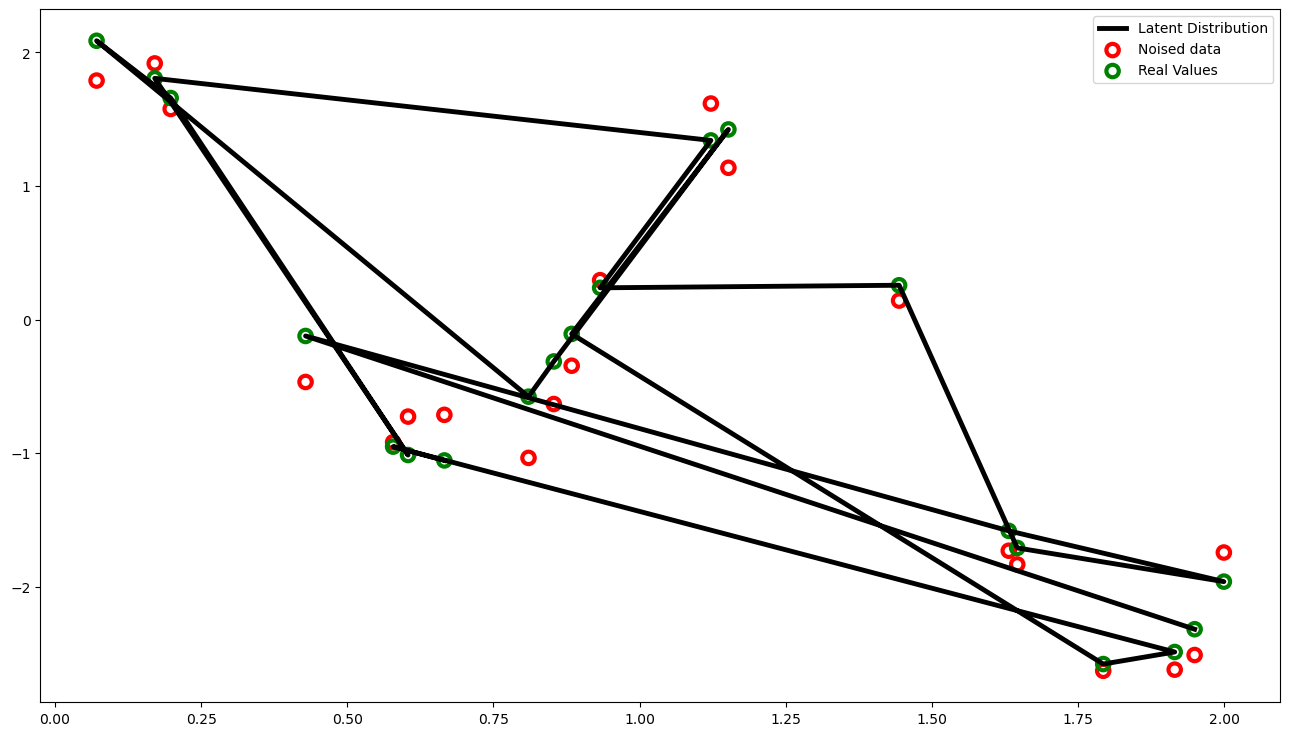

In [835]:
plt.figure(figsize=(16,9))
data_points = np.linspace(0, 2, 1000)
observations = generator_function(data_points)
noised_data = noisfy(observations)

m1 = plt.plot(data_points,observations, linewidth=3.5,label='Latent Distribution',color="black")

data_points = generate_random_data(dim=1)
observations = generator_function(data_points)
noised_data = noisfy(observations)
m2 = plt.scatter(data_points,noised_data, s=80, facecolors='none', edgecolors='r',linewidth=3, label='Noised data')
m3 = plt.scatter(data_points,observations, s=80, facecolors='none', edgecolors='g',linewidth=3, label='Noised Data')
plt.legend(['Latent Distribution','Noised data',"Real Values"])
plt.show()

In [832]:
class Loss:
    
    
    def __init__(self):
        self.init = True
        
        
    def loss(self,y,y_hat):
        return y -y_hat;
    
    def derivative(self,y,y_hat):
        return 1;
    
class MSE(Loss):
    def loss(self,y,y_hat):
        return np.sqrt(np.mean(np.power(y -y_hat,2)));
    
    def derivative(self,y,y_hat):
        return  2*(y -y_hat)

    
class Hypothesis:
    
    def __init__(self,loss,degree):
        self.weights =  5*(np.random.random(degree+1)-0.5)
        self.degree = degree
        
        self.loss = loss;
        self.history = [];
    
    def estimate(self,x):
        results = [];
        for t in x:
            result = 0;
            for i,q in enumerate(self.weights):

                poly_val = np.power(t,i);


                a = self.weights[i] * poly_val
                result +=a;
            results.append(result)
        return results

    
    def forward(self,x):
        result = 0;
        vals = [];
        self.last_results =np.zeros(list(self.weights.shape) +  [len(x)]);
        
        for i,q in enumerate(self.weights):
            
            poly_val = np.power(x,i);
            
            self.last_results[i]= poly_val
            a = self.weights[i] * poly_val
            result +=a;
            
        return result;
    
    def gradients(self,deriv):
        
 
        
        result = self.last_results*deriv
      
     
        return result
        
    
    def update(self,step_size,derivatives):
        
        self.weights -= step_size* np.mean(derivatives,axis = -1)
        

    def fit(self,x,y,iterations =1,save_history = True):
        for m in range(iterations):
            predictions = self.forward(x);

            curr_loss = self.loss.loss(predictions,y)
           
            loss_derivative = self.loss.derivative(predictions,y)
           
            grads = self.gradients(loss_derivative)
          
            if save_history:
                self.history.append([curr_loss,grads,self.weights])
          
            hypo.update(step_size,grads)    
            

        return curr_loss,loss_derivative

In [833]:
degrees = [2,3,5,7]

Total Cost = 0.9742319410254515, A = [ 1.87826743  2.5695835   1.11009012  1.62234413  0.42027568 -3.47635542
  1.09720243  2.04896027 -1.31642096 -1.25667423  2.10478762 -1.85914586
 -4.33135716 -1.02637144 -2.56048052  0.61275084 -0.98991992  0.46419471
  2.13719976  0.75106903], B = 0
Total Cost = 0.8524364025970264, A = [ 1.36124053  1.95360793  0.69909987  1.93374163  0.35350321 -2.86794415
  0.95547096  1.80600953 -0.66220506 -1.29873043  1.51110266 -1.77685882
 -3.79296207 -0.96986103 -1.53968432  1.43748129 -2.07640385  1.32093964
  1.52181706  0.08483415], B = 0
Total Cost = 0.8372731723713495, A = [ 1.36220467  1.94651699  0.65074171  1.82934442  0.40220562 -2.76495738
  0.99598037  1.83538192 -0.80234112 -1.33335529  1.50558595 -1.82547257
 -3.69246055 -0.90805647 -1.49537943  1.37606077 -1.99627885  1.26681321
  1.51493663  0.07753793], B = 0
Total Cost = 0.6196892194923171, A = [ 1.06903626  1.57065064 -0.09305611  0.25628084  0.65173684 -1.61442889
  1.1439699   1.8515487

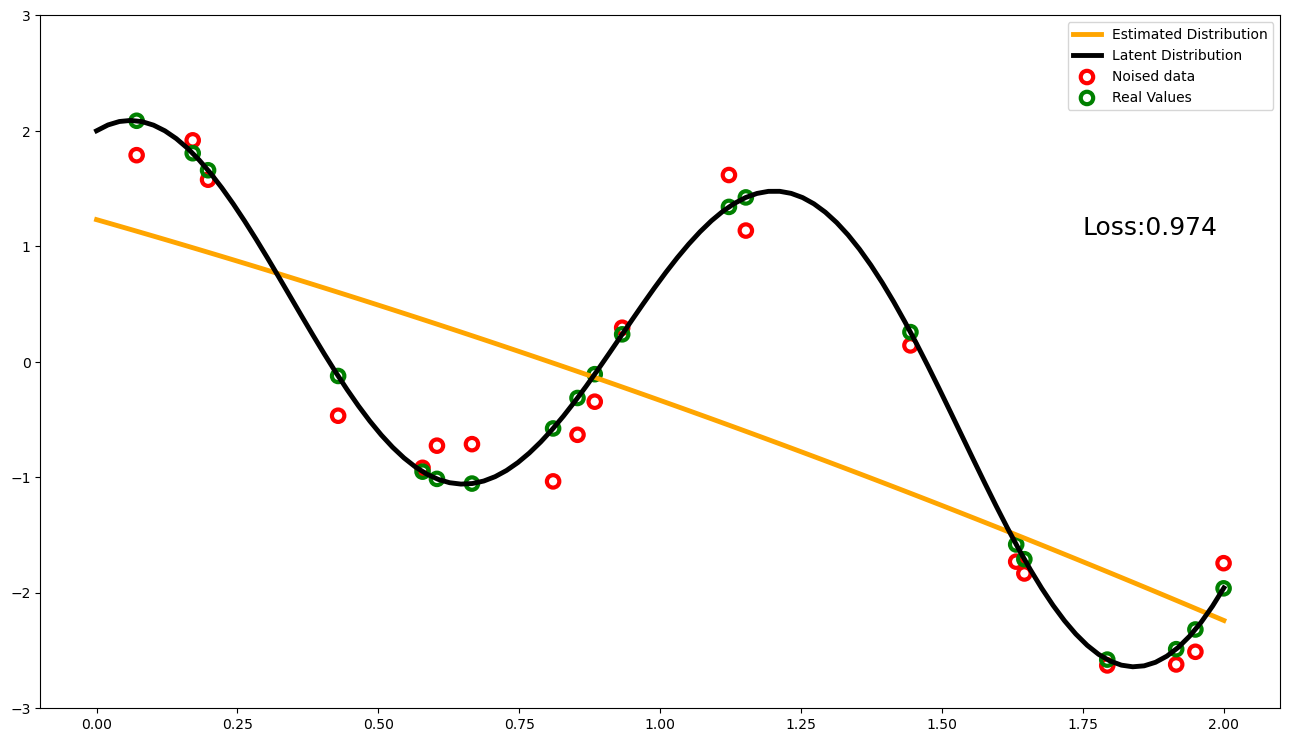

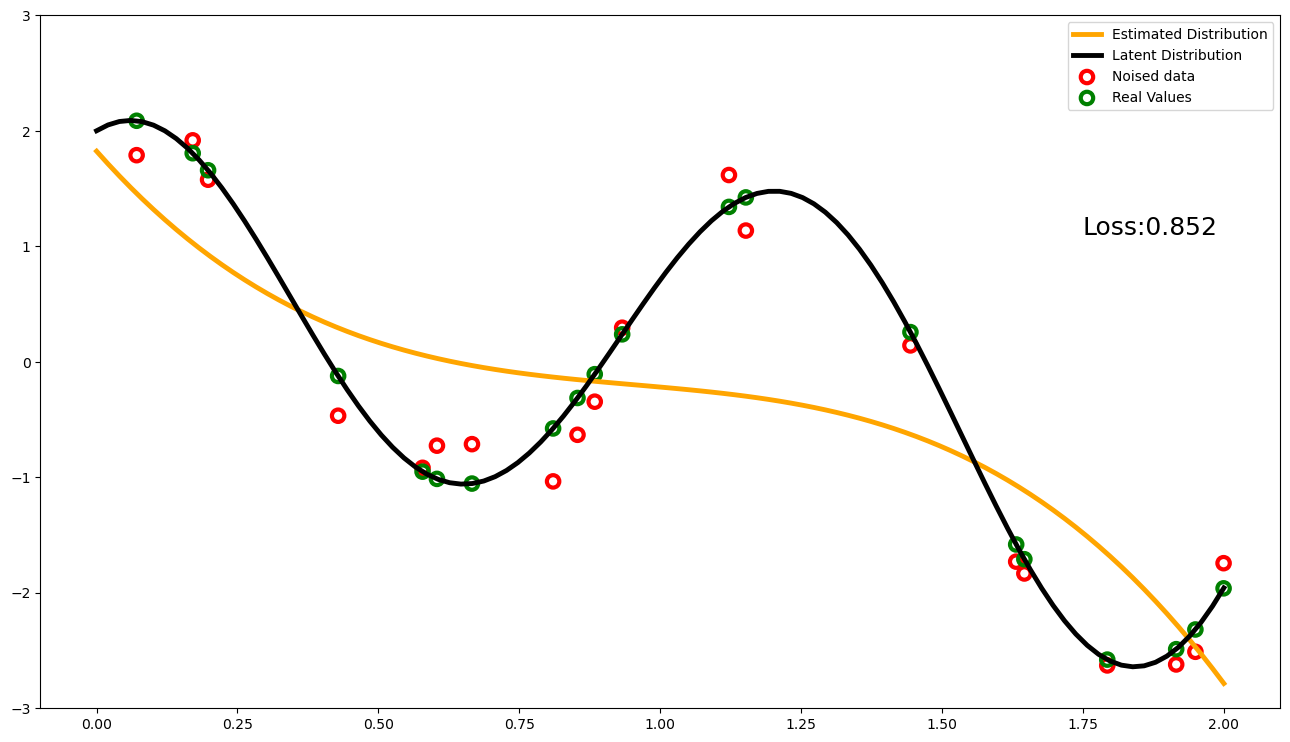

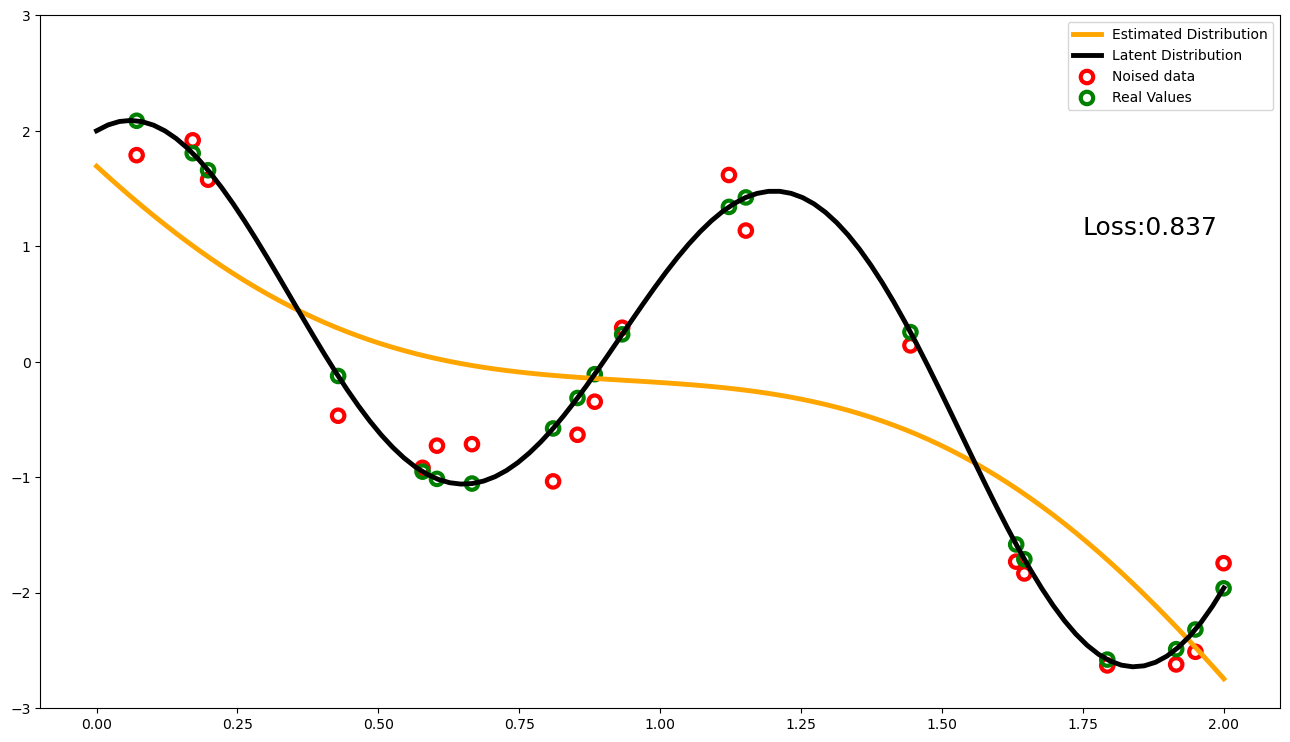

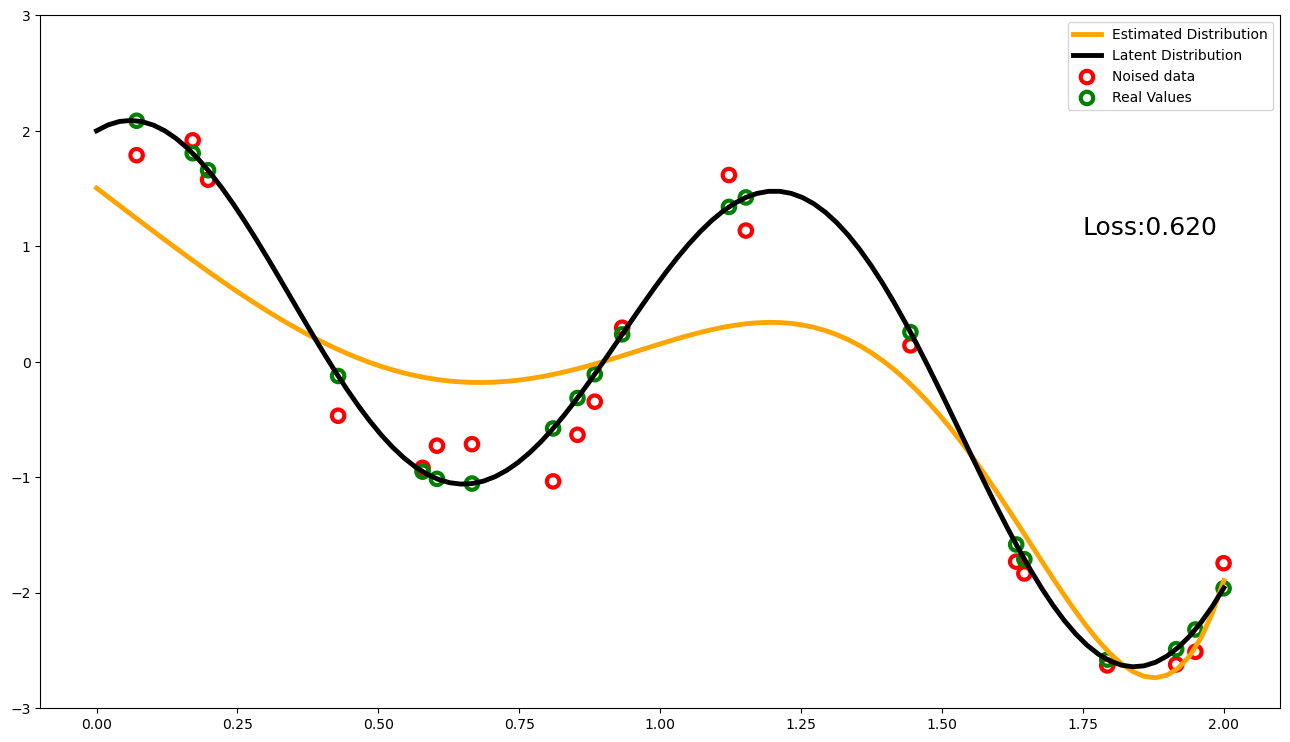

In [834]:
for degree in degrees:
    loss = MSE()
    max_iteration = 250000
    hypo = Hypothesis(loss,degree=degree)

    step_size = 0.1/(degree*degree*10)
    total_costs,total_derivative = hypo.fit(data_points,noised_data,iterations = max_iteration)
    print("Total Cost = {0}, A = {1}, B = {2}".format(total_costs,total_derivative,0))

    fig, ax = plt.subplots(figsize = (16,9))
    lin_points = np.linspace(0, 2, 100).reshape((100,1))
    values = hypo.estimate(lin_points)
    t_observe = generator_function(lin_points)

    ax.plot(lin_points,values, linewidth=3.5,label='Latent Distribution',color="orange")
    ax.plot(lin_points,t_observe,linewidth=3.5,label='Latent Distribution',color="black")

    m2 = ax.scatter(data_points,noised_data, s=80, facecolors='none', edgecolors='r',linewidth=3, label='Noised data')
    m3 = ax.scatter(data_points,observations, s=80, facecolors='none', edgecolors='g',linewidth=3, label='Noised Data')
    ax.set_ylim(-3,3)
    plt.legend(['Estimated Distribution','Latent Distribution', 'Noised data',"Real Values"])
    plt.text(1.75,1.1,"Loss:" + "{:.3f}".format(total_costs), fontsize=18)
    plt.savefig(str(degree)+ ".pdf")


   
   
      
   
   

[array([0.54830955]), array([0.52629215]), array([0.50394909]), array([0.48129383]), array([0.45833996]), array([0.4351013]), array([0.41159202]), array([0.38782684]), array([0.36382108]), array([0.3395909]), array([0.31515335]), array([0.29052665]), array([0.26573024]), array([0.24078503]), array([0.21571356]), array([0.19054015]), array([0.16529115]), array([0.1399951]), array([0.11468293]), array([0.08938819]), array([0.06414725]), array([0.03899954]), array([0.01398777]), array([-0.01084185]), array([-0.03543935]), array([-0.05975075]), array([-0.08371781]), array([-0.10727779]), array([-0.13036315]), array([-0.1529013]), array([-0.17481432]), array([-0.19601865]), array([-0.21642486]), array([-0.23593725]), array([-0.25445366]), array([-0.27186508]), array([-0.28805535]), array([-0.30290088]), array([-0.31627024]), array([-0.32802392]), array([-0.3380139]), array([-0.34608337]), array([-0.35206633]), array([-0.35578725]), array([-0.3570607]), array([-0.35569098]), array([-0.351471

In [491]:
hypo.weights =   [3.5390507501695230e+000,
    -1.1280589562338763e+001,
     1.3336654734829036e+001,
    -4.6597005629253836e+000]

In [91]:
def seperated_data(size = 100):
    a,b = np.random.randint(2,10,2)
    data,labels = [], []
    for q in range(size):
        x = np.random.rand()*50;
        offset =np.random.rand()+0.6 - 1.2
        label =   np.sign(offset);
        y = a*x +b  +  offset*np.random.random()*100;
        data.append([x,y]);
        labels.append(label)
    return np.array(data),np.array(labels)
    

In [14]:
data,labels = seperated_data()

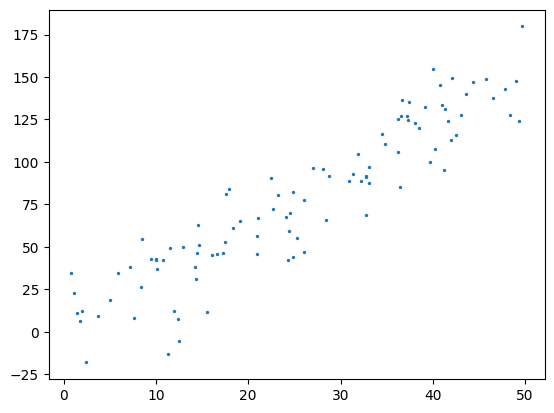

In [15]:
plt.scatter(data[:,0],data[:,1],s=2)

In [713]:
for t,k in zip(data_points,noised_data):
    print(t,k)

1.0799053884933871 1.5567858227715066
0.6325077221317352 -0.13602477296895887
1.8127716634860451 -2.285969667719906
0.18573957826921084 2.0012641783854526
1.2688575510488795 2.289382027931893
1.2687942623583939 1.676713727240338
0.861334556750142 0.057022116395075595
1.250827565692781 1.7361331195182819
0.8895612380030955 0.7787259072307515
0.5967751669424486 -0.04338542481390251
0.7828797727919292 0.13011067430122325
0.9873955020450502 1.2782872204754225
1.068860810488795 1.9580810048565986
1.6495824222385562 -0.8258489195743354
0.139267226761431 2.0661354869444732
0.18914267164480503 2.3624567059566868
1.2704331080777658 1.615182286231871
1.5640608849491144 -0.30521976808950557
0.7035456543313003 -0.5900959754704126
1.3451516232493121 1.4566772025193298
